In [1]:
# try cycling all three pulses: 4x2x2?

In [2]:
from __future__ import division, print_function
from itertools import product, chain
import sympy as sy
import numpy as np
from sig2d.signals import e_field, signals_for_order, phase_cycle, weights
from sig2d.filters import collinear, filter_terms, contains_filter

In [3]:
sy.init_printing()#fontsize="12pt")

In [4]:
sigs = sum(signals_for_order(i, 3, filters=collinear) for i in [1,2,3])
sigs

In [5]:
detected = sigs+sum([e_field(i) for i in [1,2,3]])
detected = sy.expand(sy.conjugate(detected)*detected)
print("Total nb. terms: ", len(detected.args))
detected = filter_terms(contains_filter("E_"), detected)
# by convention, drop all which contain complex conjuate of response
#detected = filter_terms(lambda e: r"conjugate(\chi" not in repr(e),
#                        detected)
print("Filtered:", len(detected.args))

Total nb. terms:  1296
Filtered: 207


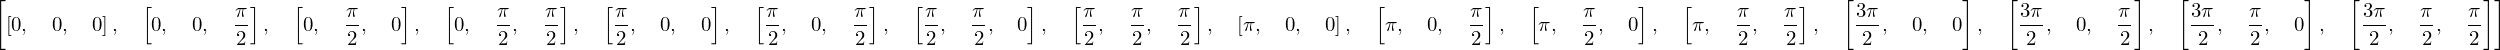

In [6]:
phases = []
for i, j, k in product(range(4), range(2), range(2)):
    phases.append([i*sy.pi/2, j*sy.pi/2, k*sy.pi/2])
phases

In [18]:
alpha = (1, -1, 1)
phases = []
phases = []
for i, j, k in product(range(4), range(2), range(2)):
    phases.append([i*sy.pi/2, j*sy.pi/2, k*sy.pi/2])
w_r = weights(alpha, phases)
cycled = phase_cycle(detected, phases, w_r, expand_norms=True)
len(cycled.args) # we still have way too many elements to cope with

In [19]:
cycled

In [20]:
filter_terms(contains_filter('a_3'), cycled)